<a href="https://colab.research.google.com/github/Simply-Adi/dev_exchanges/blob/main/krigR_mwe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For example, Download daily TimeSeries.nc using the following code in R

TimeSeries <- download_ERA(
  Variable = "2m_temperature",
  DataSet = "era5-land",
  DateStart = "1995-01-01",
  DateStop = "1995-01-04",
  TResolution = "day", # aggregate to days
  TStep = 1, # aggregate to 1 day each
  Extent = Shape_shp,
  Dir = Dir.Data,
  FileName = "TimeSeries",
  API_User = API_User,
  API_Key = API_Key
)
Plot_Raw(TimeSeries, Dates = c("01-1995", "02-1995",
                               "03-1995", "04-1995"),
         Shp = Shape_shp)

In [27]:
import xarray as xr
import numpy as np
import pandas as pd
data = xr.open_dataset('TimeSeries.nc')


In [28]:
data


<xarray.Dataset>
Dimensions:         (longitude: 54, latitude: 34, z: 4)
Coordinates:
  * longitude       (longitude) float64 9.777 9.877 9.977 ... 14.88 14.98 15.08
  * latitude        (latitude) float64 53.1 53.0 52.9 52.8 ... 50.0 49.9 49.8
  * z               (z) int32 1 2 3 4
Data variables:
    crs             int32 ...
    2m_temperature  (z, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.4
    created_by:   R, packages ncdf4 and raster (version 3.4-13)
    date:         2022-06-01 18:27:11

In [29]:
data['z']

<xarray.DataArray 'z' (z: 4)>
array([1, 2, 3, 4], dtype=int32)
Coordinates:
  * z        (z) int32 1 2 3 4
Attributes:
    units:      unknown
    long_name:  z

In [ ]:
We know that z ranges from 1 to 4.
I think this corresponds to  first four days of Jnauary 1995 CHRONOLOGICAL ORDER.
So do the replacement following this correspondence

In [30]:
data = data.rename({'z':'time'})
time_range = pd.date_range('1995-01-01','1995-01-04')
data['time'] = time_range

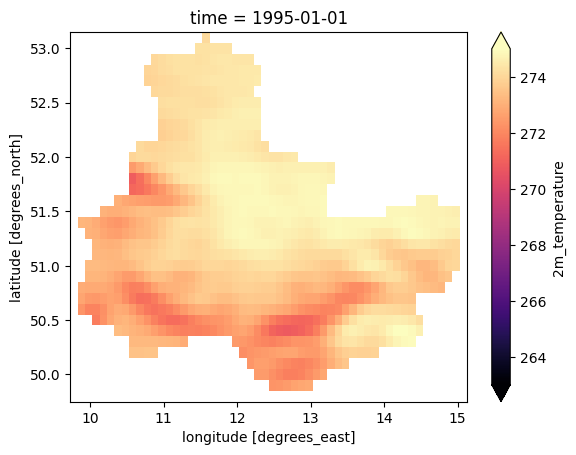

In [42]:
data['2m_temperature'].isel(time = 0).plot(cmap='magma',vmin=263,vmax=275,extend='both')

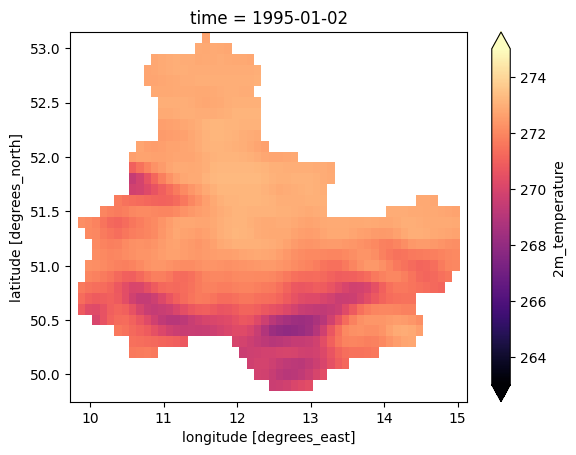

In [41]:
data['2m_temperature'].isel(time = 1).plot(cmap='magma',vmin=263,vmax=275,extend='both')

In [48]:
len(pd.date_range('1995-01-01 00:00:00','1995-01-04 23:00:00', freq='H'))

96

In [31]:
Following the above logic if I do:

TimeSeries <- download_ERA(
  Variable = "2m_temperature",
  DataSet = "era5-land",
  DateStart = "1995-01-01",
  DateStop = "1995-01-04",
  TResolution = "hourly", # aggregate to days
  TStep = 1, # aggregate to 1 day each
  Extent = Shape_shp,
  Dir = Dir.Data,
  FileName = "TimeSeries",
  API_User = API_User,
  API_Key = API_Key
)

I can similarly replace z (ranging from 1 to 96) with (pd.date_range('1995-01-01 00:00:00','1995-01-04 23:00:00', freq='H')

For OTHER scenarios with time aggregation, we would have to mentally map z to a time stamp range and programmatically replace accordingly.

<xarray.Dataset>
Dimensions:         (longitude: 54, latitude: 34, time: 4)
Coordinates:
  * longitude       (longitude) float64 9.777 9.877 9.977 ... 14.88 14.98 15.08
  * latitude        (latitude) float64 53.1 53.0 52.9 52.8 ... 50.0 49.9 49.8
  * time            (time) datetime64[ns] 1995-01-01 1995-01-02 ... 1995-01-04
Data variables:
    crs             int32 ...
    2m_temperature  (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.4
    created_by:   R, packages ncdf4 and raster (version 3.4-13)
    date:         2022-06-01 18:27:11